## Adding Header files 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import sklearn.linear_model

## Reading and Accessing Data 

In [72]:
from mnist import MNIST
mndata = MNIST('fashionmnist')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

### Converting data to Numpy format 

In [73]:
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

### Normalizing data 

In [4]:
def normalize255(X):
    X_new = X/255
    
    return X_new

def normalizeL1(X):
    X_normalized = preprocessing.normalize(X, norm='l1')
    
    return X_normalized

def normalizeL2(X):
    X_normalized = preprocessing.normalize(X, norm='l2')
    
    return X_normalized

In [53]:
## Calling different normalization function

#train_images = normalize255(train_images)
#test_images = normalize255(test_images)

train_images = normalizeL1(train_images)
test_images = normalizeL1(test_images)

#train_images = normalizeL2(train_images)
#test_images = normalizeL2(test_images)

### Defining classes: 

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Plotting few examples 

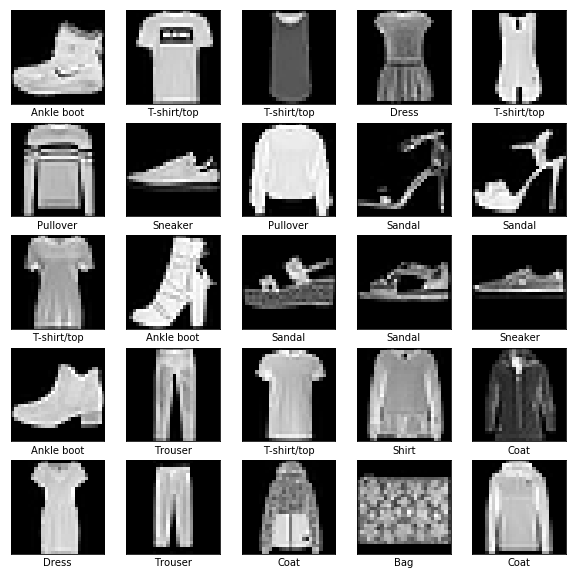

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28, 28)), cmap = 'gray')
    plt.xlabel(class_names[train_labels[i]])

## Main Program 

### Activation Function

In [13]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1. - x * x

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

#### Training 

Epoch 0 cost:  2.389409152202354
Epoch 100 cost:  2.0720044698687134
Final cost: 1.9039758363439394


Text(0,0.5,'Cost')

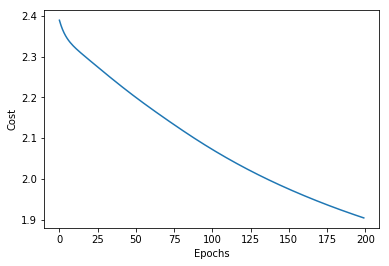

In [54]:
X, y = train_images, train_labels
classes = 10
minval = .0000001
m = 60000
n_h = 128 # number of neurons in hidden layer
learning_rate = .85

# number of samples
samples = y.shape[0]

# Reshaping labels
y = y.reshape(1, samples)

Y_new = np.eye(classes)[y.astype('int32')]
Y_new = Y_new.T.reshape(classes, samples)

X_train = X.T 
Y_train = Y_new

rand_idx = np.random.permutation(m)
X_train, Y_train = X_train[:, rand_idx], Y_train[:, rand_idx]

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat.clip(min=minval))))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

n_x = X_train.shape[0]

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(classes, n_h)
b2 = np.zeros((classes, 1))

X = X_train
Y = Y_train

error_cost = []

for i in range(200):

    Z1 = np.matmul(W1,X) + b1
    # Change for the non linearity
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    
    # Change for the non linearity with derivative
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    error_cost.append(cost)
    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)
plt.plot(error_cost)
plt.xlabel("Epochs")
plt.ylabel("Cost")

#### Testing 

[[   0    0    0    0    0    1    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    4    0    0    0    0]
 [ 997 1022  995 1047 1008  682  986  805 1008  994]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   1    2    1    0    0  276    2  158    0   10]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      1.00      0.01         4
          6       1.00      0.10      0.19      9544
          7       0.00      0.00      0.00  

/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


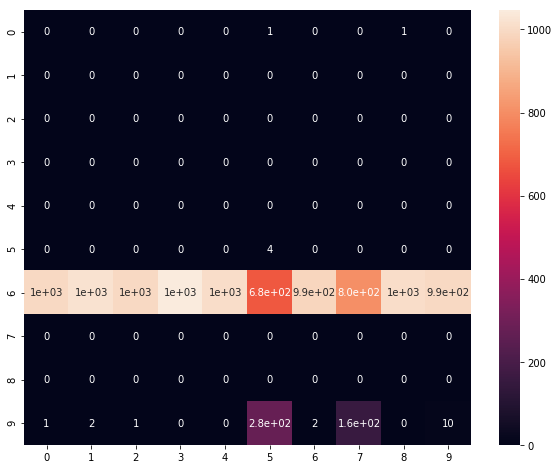

In [55]:
samples = test_labels.shape[0]

y = test_labels.reshape(1, samples)

# Converting to one hot encoder
Y_new = np.eye(classes)[test_labels.astype('int32')]
Y_new = Y_new.T.reshape(classes, samples)

X_test = test_images.T
Y_test = Y_new

# Shuffling data
rand_idx = np.random.permutation(samples)
X_test, Y_test = X_train[:, rand_idx], Y_train[:, rand_idx]

Z1 = np.matmul(W1, X_test) + b1

# Change for the non linearity
A1 = ReLU(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(predictions, labels),annot=True)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

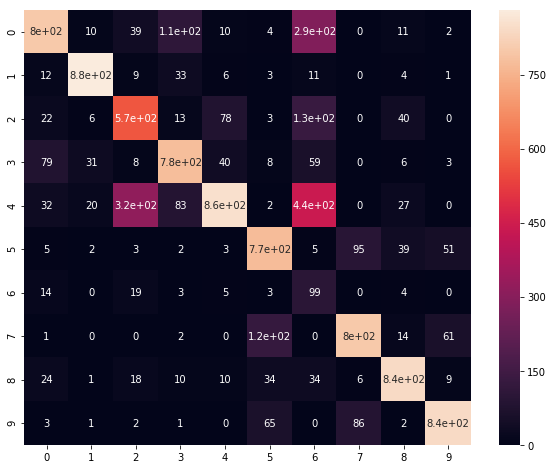

In [39]:
plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(predictions, labels),annot=True)